In [1]:
import numpy as np
import dolfin as dl
import matplotlib.pyplot as plt
from time import time

from nalger_helper_functions import circle_mesh, plot_rectangle

from nalger_helper_functions import RegularGridPatch

In [2]:
mesh = circle_mesh(np.array([0.1,0.2]), 0.5, 0.05)
V = dl.FunctionSpace(mesh, 'CG', 2)

grid_min0 = np.array([0.1, 0.2])
grid_max0 = np.array([0.7, 0.6])

anchor_point = np.array([0.5, 0.4])

patch = RegularGridPatch(V, grid_min0, grid_max0, anchor_point)

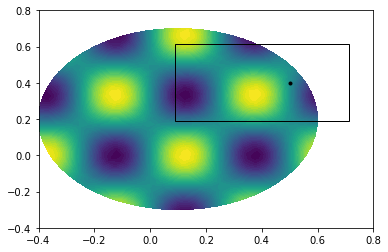

dt_function_to_grid= 0.00860142707824707
dt_grid_to_function= 0.0008916854858398438


<ipython-input-3-29da4ec9fc95>:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(patch.all_XX[0], patch.all_XX[1], U)


(-0.4, 0.8)

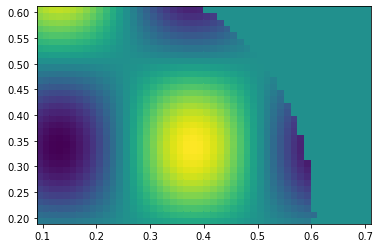

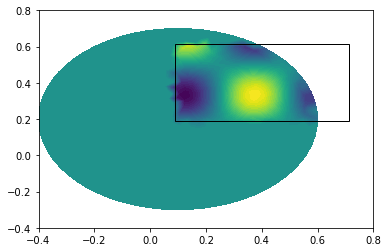

In [3]:
u_expr = dl.Expression('sin(4*pi*x[0])*cos(3*pi*x[1])', domain=mesh, degree=5)
u = dl.interpolate(u_expr, V)

fig = plt.figure()
ax = fig.add_subplot(111)
dl.plot(u)
plot_rectangle(patch.box_min, patch.box_max)
plt.plot(patch.p[0], patch.p[1], '.k')
plt.xlim(-0.4, 0.8)
plt.ylim(-0.4, 0.8)
plt.show()

t = time()
U = patch.function_to_grid(u)
dt_function_to_grid = time() - t
print('dt_function_to_grid=', dt_function_to_grid)


plt.figure()
plt.pcolor(patch.all_XX[0], patch.all_XX[1], U)


t = time()
u2 = patch.grid_to_function(U)
dt_grid_to_function = time() - t
print('dt_grid_to_function=', dt_grid_to_function)

plt.figure()
dl.plot(u2)
plot_rectangle(patch.box_min, patch.box_max)
plt.xlim(-0.4, 0.8)
plt.ylim(-0.4, 0.8)